In [1]:
import numpy as np
import healpy as hp
from scipy.stats import gmean
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from src.Luminosity.thermR import get_thermr
from src.Opacity.opacity_table import opacity
from src.Calculators.ray_maker import ray_maker
from src.Luminosity.photosphere import get_photosphere
fix = 881
m=6

In [2]:
rays_T, rays_den, _, radii = ray_maker(fix, m)

/Users/paolamartire/miniconda3/envs/tde_comparison/lib/python3.9/site-packages/numba/core/ir_utils.py:2149: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'observers' of function 'THROUPLE_S_CASTERS'.

For more information visit https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "src/Calculators/legion_of_casters.py", line 12:
@numba.njit
def THROUPLE_S_CASTERS(radii, R,
^

  warnings.warn(NumbaPendingDeprecationWarning(msg, loc=loc))


In [3]:
tau, thermr, cumulative_taus = get_thermr(rays_T, rays_den, radii)
thermr /=  6.957e10

In [4]:
plot_tau = np.zeros((len(tau),len(radii)))
for i in range(len(tau)):
    for j in range(len(tau[i])):
        temp = tau[i][j]
        plot_tau[i][-j-1] = temp
        if temp > 5:
            plot_tau[i][0:-j] = temp
            break
    plot_tau[i,0:-j] = temp
step = radii[1]-radii[0]
plot_tau = plot_tau/step

/var/folders/s6/3n46ppqn3jx7765w8c686c740000gn/T/ipykernel_40212/2997794640.py:5: RuntimeWarning: divide by zero encountered in power
  kram = 3.68 * 1e22 * (1 + 0.7389) * data_T**(-3.5) * data_den**2 #Kramers' opacity [cm^2/g]
/var/folders/s6/3n46ppqn3jx7765w8c686c740000gn/T/ipykernel_40212/2997794640.py:5: RuntimeWarning: invalid value encountered in multiply
  kram = 3.68 * 1e22 * (1 + 0.7389) * data_T**(-3.5) * data_den**2 #Kramers' opacity [cm^2/g]


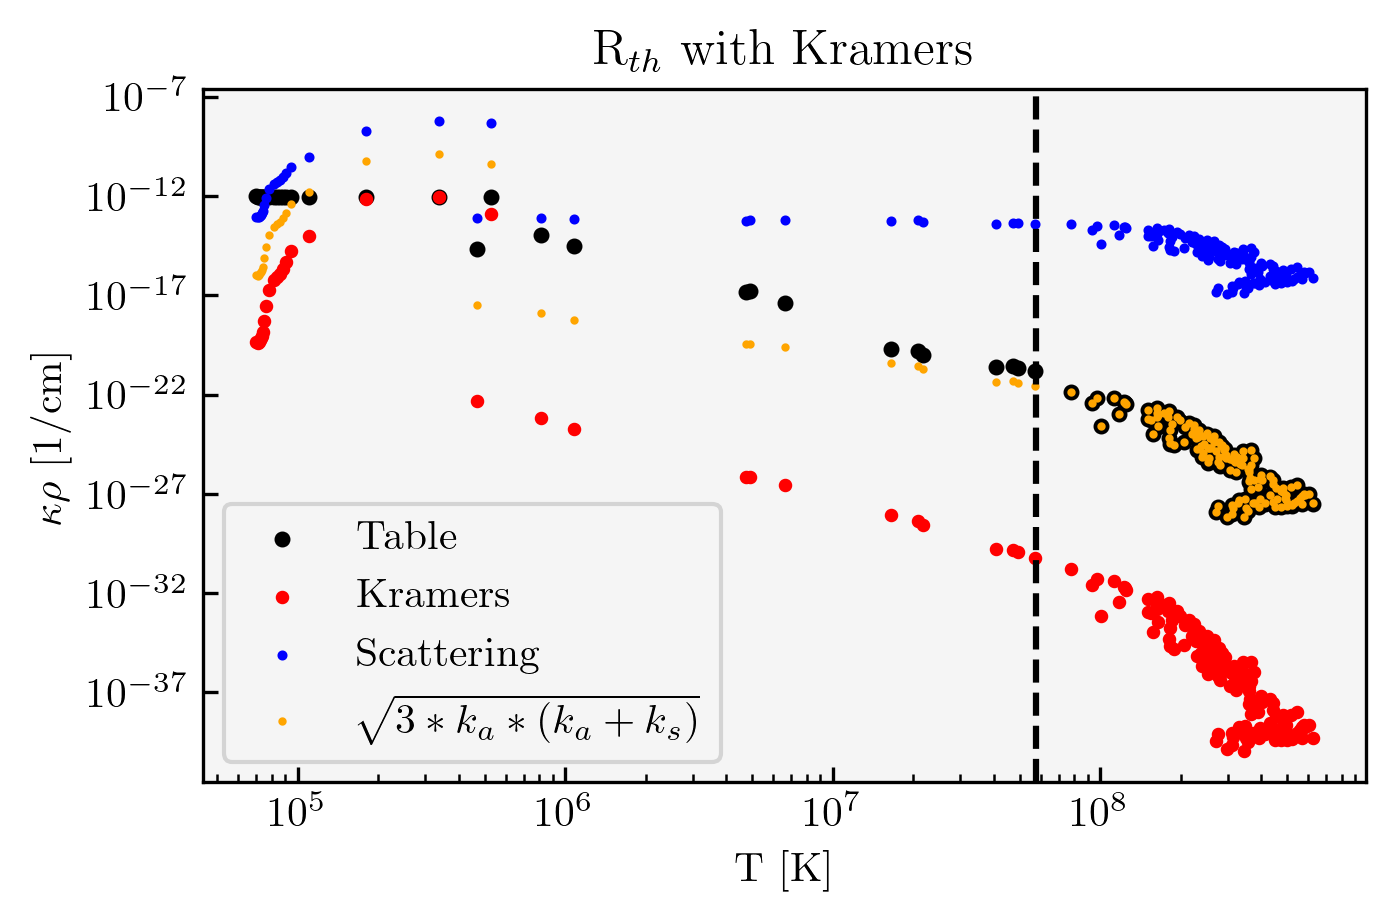

In [13]:
for index in range(91,92):
    data_den = rays_den[index]
    data_T =rays_T[index]
    kappa = plot_tau[index]
    kram = 3.68 * 1e22 * (1 + 0.7389) * data_T**(-3.5) * data_den**2 #Kramers' opacity [cm^2/g]
    scattering = (1+0.7389) * 0.2 * data_den
    sum =  np.sqrt(3*kram*(kram + scattering))
    plt.scatter(data_T,kappa, s = 8, c = 'k', label = 'Table')
    plt.scatter(data_T, kram, s = 5, c = 'r', label = 'Kramers')
    plt.scatter(data_T, scattering, s = 2, c = 'b', label = 'Scattering')
    plt.scatter(data_T,sum, s = 1, c = 'orange', label = r'$\sqrt{3*k_a*(k_a+k_s)}$')
    if index==91:
        plt.legend()
plt.axvline(x=np.exp(17.87), c = 'k', linestyle = 'dashed')
plt.xlabel('T [K]')
plt.ylabel(r'$\kappa\rho$ [1/cm]')
plt.loglog()
plt.title(r'R$_{th}$ with Kramers')
plt.show()

In [14]:
# ix = 10
# rho_selected = np.ones(len(rays_T[ix]))*1e-13
# X = 0.7389
# Z = 1 - X
# for i in range(len(rays_T[ix])):
#     no_kram = opacity(rays_T[ix][i], rho_selected[i],'effective', ln = False)/step
#     kram = 3.68 * 1e22 * (1-Z) * (1 + X) * rays_T[ix][i]**(-3.5) * rho_selected[i] #Kramers' opacity [cm^2/g]
#     tau_high = k * rho 



In [15]:
rays_kappa, rays_cumulative_kappas, rays_photo = get_photosphere(rays_T, rays_den, radii)
rays_photo /=  6.957e10

In [16]:
plot_kappa = np.zeros((len(rays_kappa),len(radii)))
for i in range(len(rays_kappa)):
    for j in range(len(rays_kappa[i])):
        temp = rays_kappa[i][j]
        plot_kappa[i][-j-1] = temp
        if temp > 5:
            plot_kappa[i][0:-j] = temp
            break
    plot_kappa[i,0:-j] = temp
step = radii[1]-radii[0]
plot_kappa = plot_kappa/step

/var/folders/s6/3n46ppqn3jx7765w8c686c740000gn/T/ipykernel_40212/3208950569.py:5: RuntimeWarning: divide by zero encountered in power
  kram = 3.68 * 1e22 * (1 + 0.7389) * data_T**(-3.5) * data_den**2 #Kramers' opacity [cm^2/g]
/var/folders/s6/3n46ppqn3jx7765w8c686c740000gn/T/ipykernel_40212/3208950569.py:5: RuntimeWarning: invalid value encountered in multiply
  kram = 3.68 * 1e22 * (1 + 0.7389) * data_T**(-3.5) * data_den**2 #Kramers' opacity [cm^2/g]


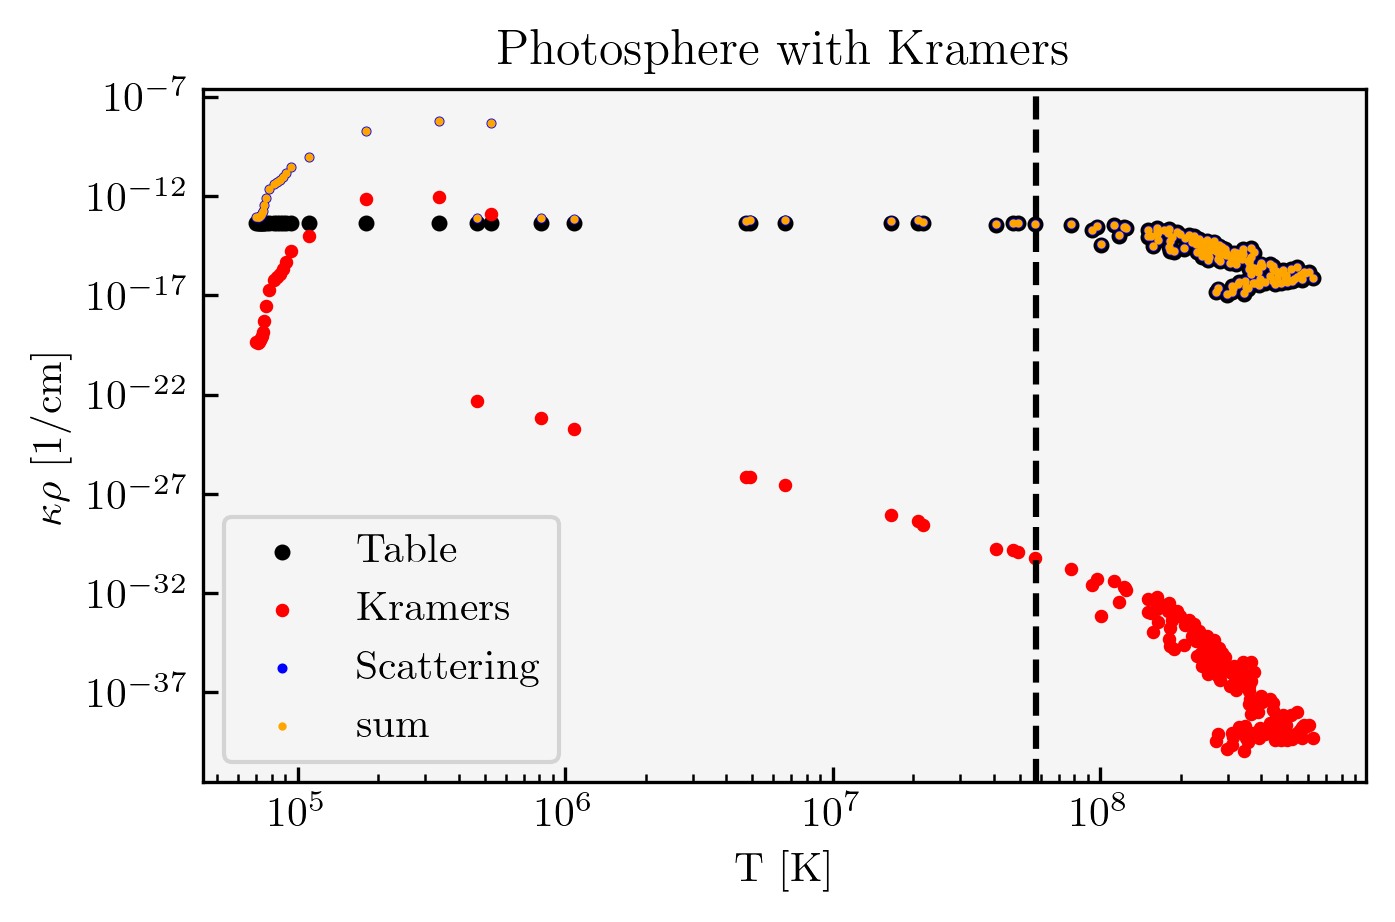

In [17]:
for index in range(91,92):
    data_den = rays_den[index]
    data_T =rays_T[index]
    kappa = plot_kappa[index]
    kram = 3.68 * 1e22 * (1 + 0.7389) * data_T**(-3.5) * data_den**2 #Kramers' opacity [cm^2/g]
    scattering = (1+0.7389) * 0.2 * data_den
    sum =  (kram + scattering)
    plt.scatter(data_T,kappa, s = 8, c = 'k', label = 'Table')
    plt.scatter(data_T, kram, s = 5, c = 'r', label = 'Kramers')
    plt.scatter(data_T, scattering, s = 2, c = 'b', label = 'Scattering')
    plt.scatter(data_T,sum, s = 1, c = 'orange', label = 'sum')
    if index==91:
        plt.legend()
plt.axvline(x=np.exp(17.87), c = 'k', linestyle = 'dashed')
plt.xlabel('T [K]')
plt.ylabel(r'$\kappa\rho$ [1/cm]')
plt.loglog()
plt.title('Photosphere with Kramers')
plt.show()